In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import feature_selection

In [ ]:
#load diabetes dataset from sklearn
X, y = datasets.load_diabetes(return_X_y=True, as_frame = True)

In [5]:
#take a look at our dataset X
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
# take a look at the ground truth/target for each patient
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Task 1: Exploring the features:
We will be using bmi, bp and s5 since they have high magnitude Pearson correlation coefficients with the target values. 

In [7]:
# Compute Pearson's r for each feature & the target

sklearn.feature_selection.r_regression(X, y)

array([ 0.18788875,  0.043062  ,  0.58645013,  0.44148176,  0.21202248,
        0.17405359, -0.39478925,  0.43045288,  0.56588259,  0.38248348])

In [8]:
#visualize the corelation between feature variables and disease progression
def PlotDataset(x, y, feature):
    '''
    x: the dataset feature matrix. (pd dataframe)
    y: the target vector (pd series)
    feature: the feature to visualize (type: str)

    '''
    plt.scatter(x.loc[:,[feature]], y,  color='black')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')


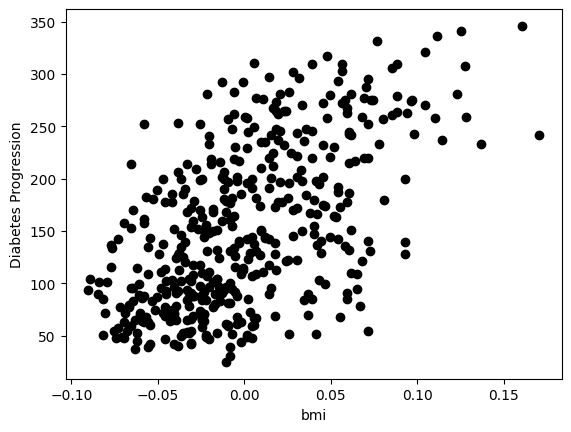

In [9]:

#TODO: change feature1 to the feature you selected
PlotDataset(X, y, "bmi")

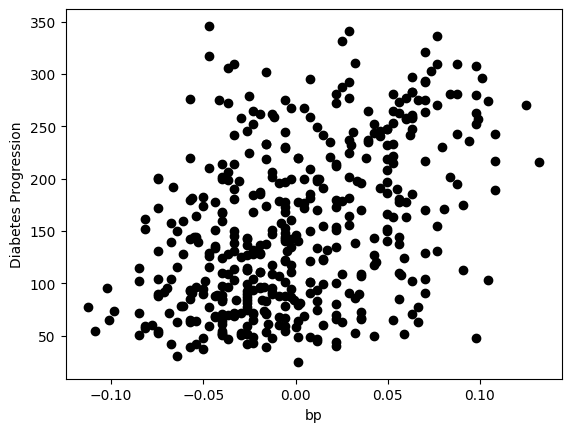

In [10]:
#TODO: change feature2 to the feature you selected
PlotDataset(X, y, "bp")

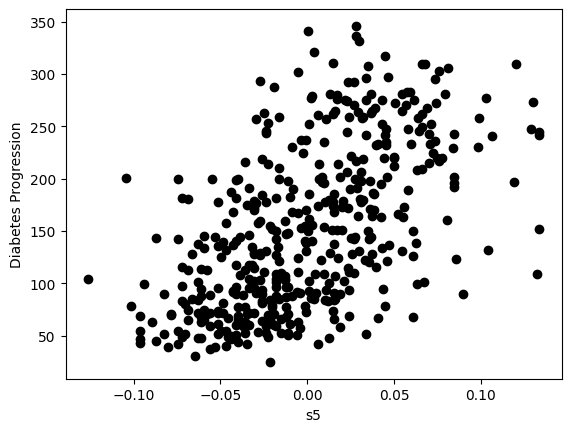

In [11]:
#TODO: change feature3 to the feature you selected
PlotDataset(X, y, "s5")


In [12]:
#define training and testing dataset

X_train = X.iloc[:300]
y_train = y.iloc[:300]
X_test = X.iloc[-100:]
y_test = y.iloc[-100:]


### Task 2: Gradient descent for linear regression:

Implement the gradient descent algorithm for linear regression. (Complete the code for gradient descent). <br>


Answer the questions below and report it in your assignment pdf file: <br>
(1) What is the MSE in your final iteration on your training set? What is the MSE on your test set? Note: Please use the formula $MSE = \frac{1}{2n} \sum_{i=1}^{n} (f_{\theta} (x^i) - y^i)^2$ <8 points ><br>

(2) Use the code below to plot the predictions and the actual diabetes progression, and include the figure in your assignment PDF. <7 points>


In [13]:
#Define the model: assume we already know the best set of coefficient theta, we can predict y using this fucntion.
def f(X, theta):
    return X.dot(theta)

def mean_squared_error(theta, X, y):
    m = len(y)
    predictions = f(X, theta)
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return mse

#TODO: Define the gradient of mean square error given theta, X, y
#you can refer to the slides on page 39 in class
def mse_gradient(theta, X, y):
    m = len(y)
    predictions = f(X, theta)
    gradient = (1 / m) * X.T.dot(predictions - y)
    return gradient




In [14]:
#add the bias term for the dataset
X_train['one'] = 1
X_test['one'] = 1

<ipython-input-14-bd4c7403ef3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['one'] = 1
<ipython-input-14-bd4c7403ef3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['one'] = 1


In [16]:
iter = 0
theta, theta_prev = np.ones(11), np.full((11), 20)
alpha = 4e-1 #alpha is the step size for gradient descent
num_iters = 8000
threshold = 1e-2
################## DO NOT CHANGE THE CODE ABOVE THIS LINE IN THE CELL  ##############################


while iter < num_iters + 1 and np.linalg.norm(theta - theta_prev) > threshold:
    gradient = mse_gradient(theta, X_train, y_train)
    theta_prev = theta
    theta = theta - alpha * gradient
    if iter % 500 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        print(f'the current theta is: {theta.to_numpy()}')
    iter += 1


Iteration 0. MSE: 6944.291987
the current theta is: [ 1.1522767   1.03092833  1.72250066  1.53595047  1.1724913   1.15050184
  0.54923675  1.44808087  1.6607082   1.42342202 60.23402722]
Iteration 500. MSE: 1763.481109
the current theta is: [  37.73479319  -38.2339919   256.03691902  171.91544224   35.06906259
    6.77501316 -143.77028155  133.39310702  238.40018435  136.27379837
  151.61593769]
Iteration 1000. MSE: 1583.006863
the current theta is: [  24.50657721 -106.52619521  366.53505917  229.36451747    6.959742
  -47.29241605 -177.8415958   142.22253929  332.623454    158.57123858
  152.13321887]
Iteration 1500. MSE: 1515.868146
the current theta is: [  10.23363869 -159.45776765  430.48802806  256.19145262  -16.51369796
  -89.86038303 -187.48437735  135.64061422  386.38427183  158.98914639
  152.28481754]
Iteration 2000. MSE: 1487.181194
the current theta is: [ 2.43698456e-01 -1.95840417e+02  4.71714166e+02  2.70555721e+02
 -3.11769434e+01 -1.17852291e+02 -1.90076103e+02  1.29564

In [17]:
print("test set MSE:", mean_squared_error(theta, X_test, y_test))

test set MSE: 1386.871429506086


Text(0, 0.5, 'Actual Diabetes Progression- test set')

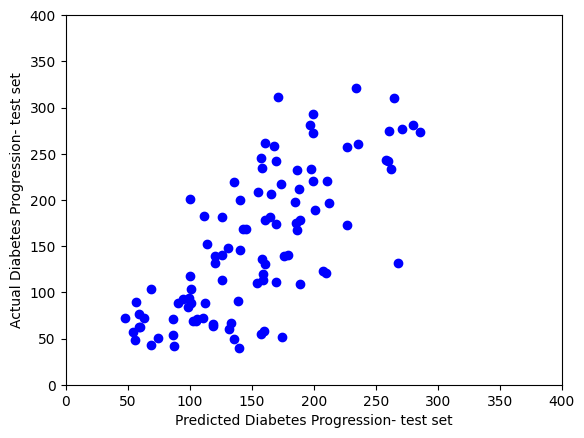

In [18]:
y_pred = f(X_test, theta)
plt.scatter(y_pred, y_test,  color='blue')
plt.xlim([0, 400])
plt.ylim([0, 400])
plt.xlabel('Predicted Diabetes Progression- test set')
plt.ylabel('Actual Diabetes Progression- test set')